# Homework 1 Problem #2

In [1]:
import multiprocessing as mp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mplt
import pandas as pd

# Minimum Function

In [2]:
N = 10**6
x = np.random.rand(N)

def inmin(y,q):
    q.put(min(y))

def parmin(x,nc):
    # Divide the array into chunks
    N = len(x)
    ls = N//nc + 1
    # ys is list of chunks
    ys = [x[ls*i:ls*i+ls] for i in range(nc)]
    # make a return queue
    q = mp.Queue()
    # We want to send chunks to seperate processes
    jobs = [mp.Process(target=inmin,args = (y,q)) for y in ys]
    for job in jobs:
        job.start()
    # Then wait for processes to send mins back
    for job in jobs:
        job.join()
    # min mins
    mins = []
    while not q.empty():
        mins.append(q.get())
    tmin = min(mins)
    # Return total min
    return tmin

parmin(x,4) - min(x)

0.0

# Maximum Function

In [3]:
N = 10**6
x = np.random.rand(N)

def inmax(y,q):
    q.put(max(y))

def parmax(x,nc):
    # Divide the array into chunks
    N = len(x)
    ls = N//nc + 1
    # ys is list of chunks
    ys = [x[ls*i:ls*i+ls] for i in range(nc)]
    # make a return queue
    q = mp.Queue()
    # We want to send chunks to seperate processes
    jobs = [mp.Process(target=inmax,args = (y,q)) for y in ys]
    for job in jobs:
        job.start()
    # Then wait for processes to send maxs back
    for job in jobs:
        job.join()
    # max maxs
    maxs = []
    while not q.empty():
        maxs.append(q.get())
    tmax = max(maxs)
    # Return total max
    return tmax

parmax(x,4) - max(x)

0.0

# Mean Function

In [4]:
N = 10**6
x = np.random.rand(N)

def insum(y,q):
    q.put(sum(y))

def parmean(x,nc):
    # Divide the array into chunks
    N = len(x)
    ls = N//nc + 1
    # ys is list of chunks
    ys = [x[ls*i:ls*i+ls] for i in range(nc)]
    # make a return queue
    q = mp.Queue()
    # We want to send chunks to seperate processes
    jobs = [mp.Process(target=insum,args = (y,q)) for y in ys]
    for job in jobs:
        job.start()
    # Then wait for processes to send sums back
    for job in jobs:
        job.join()
    # Sum sums
    sums = 0
    while not q.empty():
        sums += q.get()
    # Divide sum by length(N)
    xbar = sums/N
    # Return mean
    return xbar

parmean(x,10) - np.mean(x)

-1.4432899320127035e-15

# Standard Deviation Function

In [5]:
N = 10**4
x = np.random.rand(N)

def instd(y,q,xbar):
    q.put(sum([(xval - xbar)**2 for xval in y]))

def parstd(x,nc):
    # Get the mean of x
    xbar = parmean(x,nc)
    
    # Divide the array into chunks
    N = len(x)
    ls = N//nc + 1
    # ys is list of chunks
    ys = [x[ls*i:ls*i+ls] for i in range(nc)]
    # make a return queue
    q = mp.Queue()
    # We want to send chunks to seperate processes
    jobs = [mp.Process(target=instd,args = (y,q,xbar)) for y in ys]
    for job in jobs:
        job.start()
    # Then wait for processes to send sums squared back
    for job in jobs:
        job.join()
    # Sum sums
    sums = 0
    while not q.empty():
        sums += q.get()
    # Divide sum by length(N)-1
    std = np.sqrt(sums/(N))
    # Return standard deviation
    return std

print(parstd(x,10) - np.std(x))

5.55111512313e-17


# Timings Section

In [6]:
N = 10**6
x = np.random.rand(N)
nc = 4
min_timings = []
max_timings = []
std_timings = []

In [7]:
for i in range(nc):
    times = %%timeit -o -n 1 pass
    parmin(x,nc)
    min_timings.append(times.average)

191 ns ± 151 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
305 ns ± 219 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
215 ns ± 203 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
223 ns ± 206 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
for i in range(nc):
    times = %%timeit -o -n 1 pass
    parmax(x,nc)
    max_timings.append(times.average)

252 ns ± 155 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
206 ns ± 169 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 21.54 times longer than the fastest. This could mean that an intermediate result is being cached.
490 ns ± 856 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
206 ns ± 175 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
for i in range(nc):
    times = %%timeit -o -n 1 pass
    parstd(x,nc)
    std_timings.append(times.average)

211 ns ± 194 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
194 ns ± 186 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
175 ns ± 122 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
190 ns ± 157 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
ncores = [i+1 for i in range(nc)]
t_ep = [(i+1)**0 for i in range(nc)]

In [11]:
sp_min  = [min_timings[0]/min_timings[i] for i in range(len(min_timings))]
sp_max  = [max_timings[0]/max_timings[i] for i in range(len(max_timings))]
sp_std  = [std_timings[0]/std_timings[i] for i in range(len(std_timings))]

In [12]:
ep_min = [sp_min[i]/nc for i in range(nc)]
ep_max = [sp_max[i]/nc for i in range(nc)]
ep_std = [sp_std[i]/nc for i in range(nc)]

In [13]:
d_min = [[i+1 for i in range(nc)],min_timings,sp_min,ncores,ep_min,t_ep]
d_max = [[i+1 for i in range(nc)],max_timings,sp_max,ncores,ep_max,t_ep]
d_std = [[i+1 for i in range(nc)],std_timings,sp_std,ncores,ep_std,t_ep]

In [14]:
columns = ["Number of Processors","Time","Speed-Up","Theoretical Speed-Up","Efficiency","Theoretical Efficiency"]
timings_min = pd.DataFrame(data=d_min,index=columns).T
timings_max = pd.DataFrame(data=d_max,index=columns).T
timings_std = pd.DataFrame(data=d_std,index=columns).T

In [15]:
timings_min

,Number of Processors,Time,Speed-Up,Theoretical Speed-Up,Efficiency,Theoretical Efficiency
0,1.0,1.914286e-07,1.000000,1.0,0.250000,1.0
1,2.0,3.054286e-07,0.626754,2.0,0.156689,1.0
2,3.0,2.148569e-07,0.890959,3.0,0.222740,1.0
3,4.0,2.229998e-07,0.858425,4.0,0.214606,1.0


Text(0,0.5,'Speed-Up')

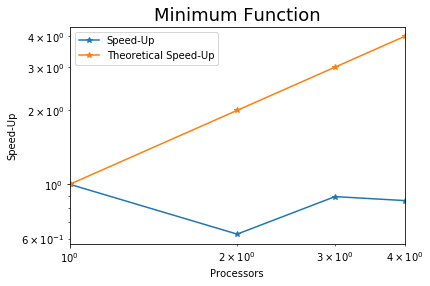

In [16]:
min_plot = timings_min.plot(x = "Number of Processors",y = ["Speed-Up","Theoretical Speed-Up"],style="*-",loglog=True)
min_plot.set_title("Minimum Function",fontsize = 18)
min_plot.set_xlabel("Processors")
min_plot.set_ylabel("Speed-Up")

Text(0,0.5,'Efficiency')

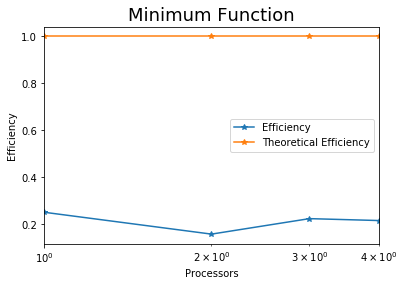

In [17]:
min_plot = timings_min.plot(x = "Number of Processors",y = ["Efficiency","Theoretical Efficiency"],style="*-",logx=True)
min_plot.set_title("Minimum Function",fontsize = 18)
min_plot.set_xlabel("Processors")
min_plot.set_ylabel("Efficiency")

In [18]:
timings_max

,Number of Processors,Time,Speed-Up,Theoretical Speed-Up,Efficiency,Theoretical Efficiency
0,1.0,2.515717e-07,1.000000,1.0,0.250000,1.0
1,2.0,2.055715e-07,1.223767,2.0,0.305942,1.0
2,3.0,4.901428e-07,0.513262,3.0,0.128316,1.0
3,4.0,2.062859e-07,1.219529,4.0,0.304882,1.0


Text(0,0.5,'Speed-Up')

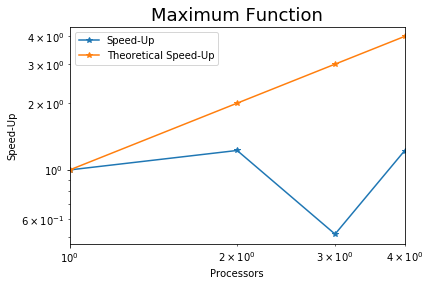

In [19]:
max_plot = timings_max.plot(x = "Number of Processors",y = ["Speed-Up","Theoretical Speed-Up"],style="*-",loglog=True)
max_plot.set_title("Maximum Function",fontsize = 18)
max_plot.set_xlabel("Processors")
max_plot.set_ylabel("Speed-Up")

Text(0,0.5,'Efficiency')

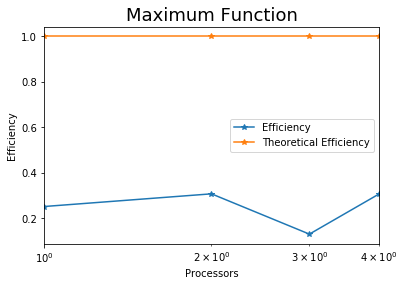

In [20]:
max_plot = timings_max.plot(x = "Number of Processors",y = ["Efficiency","Theoretical Efficiency"],style="*-",logx=True)
max_plot.set_title("Maximum Function",fontsize = 18)
max_plot.set_xlabel("Processors")
max_plot.set_ylabel("Efficiency")

In [21]:
timings_std

,Number of Processors,Time,Speed-Up,Theoretical Speed-Up,Efficiency,Theoretical Efficiency
0,1.0,2.114282e-07,1.000000,1.0,0.250000,1.0
1,2.0,1.937146e-07,1.091442,2.0,0.272860,1.0
2,3.0,1.751427e-07,1.207177,3.0,0.301794,1.0
3,4.0,1.901429e-07,1.111944,4.0,0.277986,1.0


Text(0,0.5,'Speed-Up')

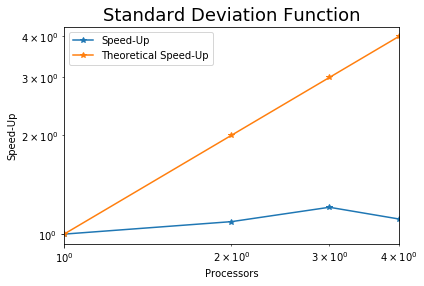

In [22]:
std_plot = timings_std.plot(x = "Number of Processors",y = ["Speed-Up","Theoretical Speed-Up"],style="*-",loglog=True)
std_plot.set_title("Standard Deviation Function",fontsize = 18)
std_plot.set_xlabel("Processors")
std_plot.set_ylabel("Speed-Up")

Text(0,0.5,'Efficiency')

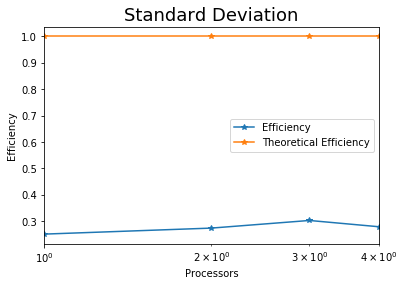

In [23]:
std_plot = timings_std.plot(x = "Number of Processors",y = ["Efficiency","Theoretical Efficiency"],style="*-",logx=True)
std_plot.set_title("Standard Deviation",fontsize = 18)
std_plot.set_xlabel("Processors")
std_plot.set_ylabel("Efficiency")